##Undistort & Perspective Transform

[[560.33148363   0.         651.26264911]
 [  0.         561.3767079  499.06540191]
 [  0.           0.           1.        ]]
[[-2.32949182e-01  6.17242707e-02 -1.80423444e-05  3.39635746e-05
  -7.54961807e-03]]


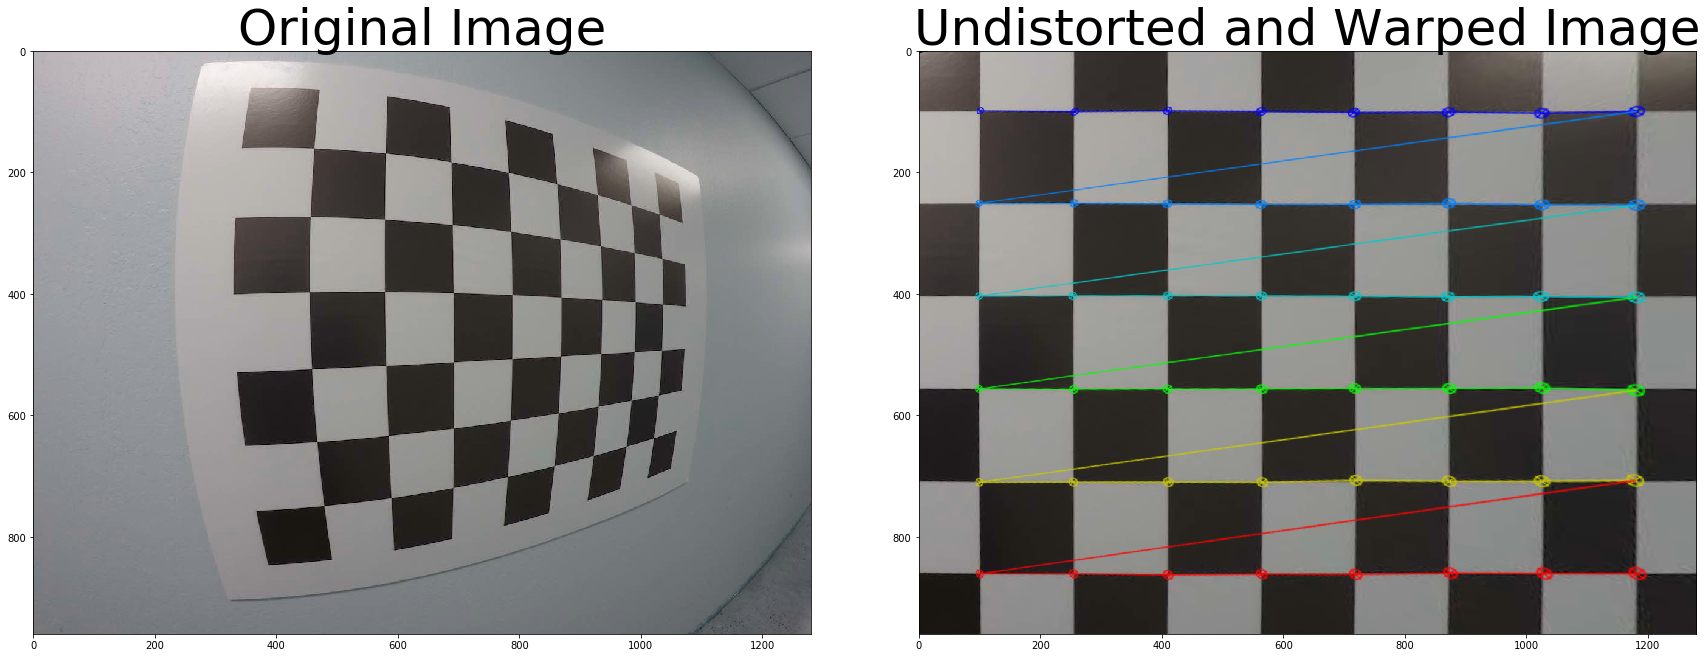

In [4]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Read in the saved camera matrix and distortion coefficients
# These are the arrays you calculated using cv2.calibrateCamera()
dist_pickle = pickle.load( open( "/Users/brandoncanniff/Code2020/Self-Driving-Cars/Camera Calibration/CarND-Camera-Calibration/wide_dist_pickle.p", "rb" ) )
mtx = dist_pickle["mtx"]
print(mtx)
dist = dist_pickle["dist"]
print(dist)
# Read in an image
img = cv2.imread('/Users/brandoncanniff/Code2020/Self-Driving-Cars/Camera Calibration/CarND-Camera-Calibration/test_image2.png')
nx = 8 # the number of inside corners in x
ny = 6 # the number of inside corners in y

# MODIFY THIS FUNCTION TO GENERATE OUTPUT 
# THAT LOOKS LIKE THE IMAGE ABOVE
def corners_unwarp(img, nx, ny, mtx, dist):
    # Pass in your image into this function
    # Write code to do the following steps
    # 1) Undistort using mtx and dist
    undst = cv2.undistort(img, mtx, dist, None, mtx)
    # 2) Convert to grayscale
    gray = cv2.cvtColor(undst, cv2.COLOR_BGR2GRAY)
    # 3) Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    # 4) If corners found: 
    if ret == True:
        # a) draw corners
        cv2.drawChessboardCorners(undst, (nx, ny), corners, ret)
        # b) define 4 source points src = np.float32([[,],[,],[,],[,]])
        img_size = [gray.shape[1], gray.shape[0]]
        top_left = corners[0][0]
        top_right = corners[nx-1][0]
        bottom_left = corners[-nx][0]
        bottom_right = corners[-1][0]
        src = np.float32([top_left, top_right, bottom_left, bottom_right])
        # c) define 4 destination points dst = np.float32([[,],[,],[,],[,]])
        offset = 100
        dst = np.float32([[offset,offset], [img_size[0] - offset,offset], [offset,img_size[1] - offset], [img_size[0] - offset, img_size[1] - offset]])
        # d) use cv2.getPerspectiveTransform() to get M, the transform matrix
        M = cv2.getPerspectiveTransform(src, dst)
        # e) use cv2.warpPerspective() to warp your image to a top-down view
        warped = cv2.warpPerspective(undst, M, (gray.shape[1], gray.shape[0]))
    return warped, M

top_down, perspective_M = corners_unwarp(img, nx, ny, mtx, dist)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(top_down)
ax2.set_title('Undistorted and Warped Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
